In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kn
import plotly.graph_objects as go
import random

In [3]:
from plotly.subplots import make_subplots

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [4]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [5]:
df = pd.read_csv('train_cleaned_v.2.csv')

In [6]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isRatable,isAdult,numRegions,ratingCount,countryOfOrigin,genres,ratingMean,ReviewsTotal,popularityIndex
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",0.801370,0.070175,0.000000,0.411369,0.084924,0.350105,tvEpisode,0.000000,False,True,False,0.000000,0.000939,['US'],"Action,Adventure,Animation",0.777778,0.092661,0.354889
1,Looping,"(5, 6]",0.712329,0.049123,0.000000,0.058580,0.084924,0.000000,videoGame,0.000000,False,True,False,0.000000,0.000007,['XWG'],Action,0.555556,0.000000,0.037519
2,Idealnaya para,"(5, 6]",0.780822,0.161404,0.000000,0.158191,0.084924,0.368770,movie,0.000000,False,True,False,0.000000,0.000040,['RU'],Comedy,0.555556,0.092661,0.101318
3,MasterChef Celebrity México,"(5, 6]",0.979452,0.092982,0.000000,0.082893,0.384160,0.489104,tvSeries,0.000000,True,True,False,0.000000,0.000012,['MX'],Reality-TV,0.555556,0.000000,0.077896
4,Seutateueob,"(7, 8]",0.972603,0.140351,0.139085,0.665190,0.717011,0.464013,tvSeries,0.143559,True,True,False,0.788491,0.019052,['KR'],"Comedy,Drama,Romance",0.777778,0.818761,0.994318


In [7]:
df.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,AwNmExWins,numRegions,ratingCount,ratingMean,ReviewsTotal,popularityIndex
count,15925.000000,15925.000000,15925.00000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000
mean,0.782299,0.104119,0.02742,0.196306,0.161657,0.415279,0.032908,0.133626,0.001706,0.685805,0.121934,0.179321
std,0.177556,0.068448,0.08865,0.149170,0.146447,0.155723,0.102543,0.200470,0.021971,0.153072,0.163077,0.174958
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.684932,0.050877,0.00000,0.082893,0.084924,0.320806,0.000000,0.000000,0.000012,0.555556,0.000000,0.061898
50%,0.815068,0.092982,0.00000,0.158191,0.134602,0.422010,0.000000,0.000000,0.000040,0.666667,0.092661,0.127166
75%,0.924658,0.157895,0.00000,0.275891,0.238413,0.512704,0.000000,0.257722,0.000183,0.777778,0.185323,0.236254
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.634836


In [8]:
del df['popularityIndex']
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['isAdult']
del df['isRatable']
del df['canHaveEpisodes']

In [9]:
df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,AwNmExWins,numRegions,ratingCount,ratingMean,ReviewsTotal
0,0.801370,0.070175,0.000000,0.411369,0.084924,0.350105,0.000000,0.000000,0.000939,0.777778,0.092661
1,0.712329,0.049123,0.000000,0.058580,0.084924,0.000000,0.000000,0.000000,0.000007,0.555556,0.000000
2,0.780822,0.161404,0.000000,0.158191,0.084924,0.368770,0.000000,0.000000,0.000040,0.555556,0.092661
3,0.979452,0.092982,0.000000,0.082893,0.384160,0.489104,0.000000,0.000000,0.000012,0.555556,0.000000
4,0.972603,0.140351,0.139085,0.665190,0.717011,0.464013,0.143559,0.788491,0.019052,0.777778,0.818761


In [34]:
n_attributes = len(df.columns)
print(n_attributes)

11


In [10]:
#NORMALIZZAZIONE MINMAX O ZSCORE, COMMMENTARE UNA DELLE DUE RIGHE IN BASE AL TIPO DI NORMALIZZAZIONE CHE SI VUOLE UTILIZZARE
#PER I NOSTRI DATI SEMBRA MEGLIO MIN/MAX

scaler = MinMaxScaler()
#scaler = StandardScaler()
train_data = scaler.fit_transform(df)

In [11]:
def create_kdistance_graph(data, k):
  """Crea un grafico k-distance per i dati.

  Args:
    data: Un array numpy contenente i dati.
    k: Il numero di vicini da considerare.

  Returns:
    Un array numpy contenente le distanze k-esimo vicino per ogni punto.
  """

  # Calcola le distanze ai k vicini più vicini per ogni punto
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Prendi la distanza dal k-esimo vicino più vicino
  distances = distances[:, k]
  distances = np.sort(distances, axis=0)

  return distances

In [ ]:
# CODICE ITERATIVO PER CALCOLARE L'EPS OTTIMALE PER OGNI K (DA 2 A 51) ATTRAVERSO LA K-DISTANCE
# CO L'EPSILON MEDIO CE FAMO ER BRODO
epsilon_list = []

for k in range(2,51): # Numero di vicini
    distances = create_kdistance_graph(df, k)
    x = np.arange(len(distances))
    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    elbow_k = kn.elbow
    epsilon = distances[elbow_k]
    epsilon_list.append(epsilon)
    print("Epsilon ottimale secondo il metodo del gomito: k={} epsilon={}".format(k, epsilon))

media_epsilon = np.mean(epsilon_list)
print("La media degli epsilon è:", media_epsilon)


Epsilon ottimale secondo il metodo del gomito: k=2 epsilon=0.32791256613064584
Epsilon ottimale secondo il metodo del gomito: k=3 epsilon=0.36680191444446625
Epsilon ottimale secondo il metodo del gomito: k=4 epsilon=0.3465512695839202
Epsilon ottimale secondo il metodo del gomito: k=5 epsilon=0.3716978040982406
Epsilon ottimale secondo il metodo del gomito: k=6 epsilon=0.3653820489038116
Epsilon ottimale secondo il metodo del gomito: k=7 epsilon=0.3710308925816074
Epsilon ottimale secondo il metodo del gomito: k=8 epsilon=0.3326619585575635
Epsilon ottimale secondo il metodo del gomito: k=9 epsilon=0.4099940615444614
Epsilon ottimale secondo il metodo del gomito: k=10 epsilon=0.36108603317735843
Epsilon ottimale secondo il metodo del gomito: k=11 epsilon=0.4759671311207161
Epsilon ottimale secondo il metodo del gomito: k=12 epsilon=0.34194769752831594
Epsilon ottimale secondo il metodo del gomito: k=13 epsilon=0.5241802411876508
Epsilon ottimale secondo il metodo del gomito: k=14 epsi

0.4759671311207161


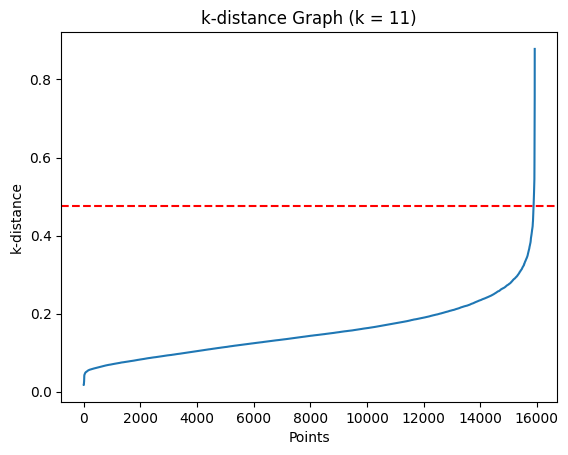

In [ ]:
# CODICE PER CALCOLARE LA K DISTANCE DI UN K E IL SUO RELATIVO EPS OTIIMALE SECONDO IL METODO DEL GOMITO
distances = create_kdistance_graph(df, n_attributes)
kn = KneeLocator(x, distances, curve='convex', direction='increasing')
elbow_k = kn.elbow
epsilon = distances[elbow_k]
print(epsilon)

# Plotta il grafico
plt.plot(distances)
# Aggiungi la linea orizzontale
plt.axhline(y=epsilon, color='r', linestyle='--')
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph (k = 11)')
plt.show()

In [112]:
# IL MINIMO DEI SAMPLES DEVE ESSERE K+1, E DI SOLITO SI SCEGLIE UN MINIMO CHE è UGUALE AL NUMERO DI ATTRIBUTI(VARIABILI) PRESENTI NEL DATASET.
# CODICE PER CALCOLARE IL density based clustering
print('DBSCAN')

dbscan = DBSCAN(eps=0.225, min_samples=12, metric='euclidean')
dbscan.fit(df)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(df[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

DBSCAN
labels {np.int64(-1): np.int64(1015), np.int64(0): np.int64(14893), np.int64(1): np.int64(17), np.int64(2): np.int64(0)}
silhouette 0.5797475982549938


0.18 buono k=12

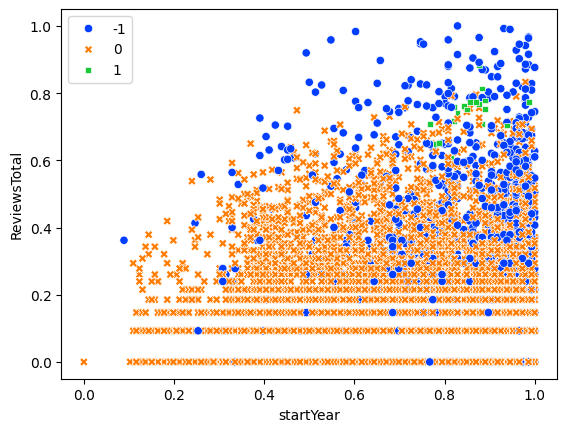

In [110]:
sns.scatterplot(data=df, 
                x="startYear", 
                y="ReviewsTotal", 
                hue=dbscan.labels_, 
                style=dbscan.labels_,
                palette="bright")
plt.show()

## Hierarchical clustering